In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn import svm
from sklearn.model_selection import train_test_split
from skimage.feature import hog
from skimage.color import rgb2grey
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD


from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
def featurize_text(dataframe):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(dataframe.ravel())
    
    svd = TruncatedSVD(n_components=30)
    Y = svd.fit_transform(X)

    return Y

In [3]:
data = pd.read_csv("Datasets/Question-5/Train.csv", delimiter=',')

author_unique = data['author'].unique()
data['author'] = data['author'].astype('category')
data['author'] = data['author'].cat.reorder_categories(author_unique, ordered=True)
data['author'] = data['author'].cat.codes

x = data.iloc[:,1:-1]
y = data.iloc[:,-1]
y1 = pd.DataFrame(y.values.reshape((y.shape[0],1)))

In [4]:
feature_list = featurize_text(x.values)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(feature_list, y, test_size=0.3,random_state=0)

In [22]:
c = [i for i in range(1,16)]
a = []
f = []

In [23]:
for i in c:
    classifier = svm.SVC(kernel='linear', C=i)
    classifier.fit(X_train, y_train)
    p = classifier.predict(X_test)
    a.append(accuracy_score(y_test, p))
    f.append(f1_score(y_test, p, average='weighted'))

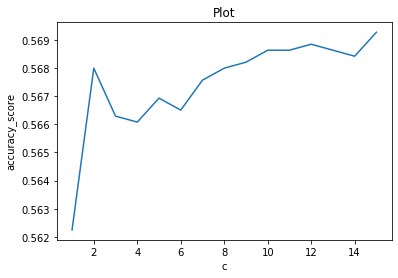

In [24]:
plt.plot(c, a) 
plt.xlabel('c')
plt.ylabel('accuracy_score')
plt.title('Plot')
plt.show() 

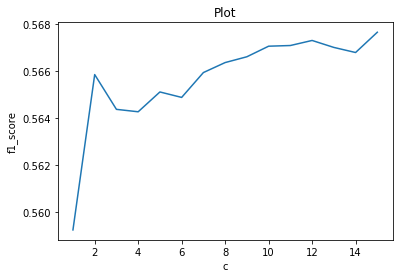

In [25]:
plt.plot(c, f) 
plt.xlabel('c')
plt.ylabel('f1_score')
plt.title('Plot')
plt.show() 

In [29]:
classifier = svm.SVC(kernel='linear', C=12)
classifier.fit(X_train, y_train)
p = classifier.predict(X_test)
confusion_matrix(y_test, p)

array([[ 728,  262,  453],
       [ 133,  698,  522],
       [ 286,  370, 1247]])

In [30]:
classifier = svm.SVC(kernel='linear', C=12)
classifier.fit(X_train, y_train)
p = classifier.predict(X_test)
accuracy_score(y_test, p)

0.5688444349861673

In [13]:
classifier = svm.SVC(kernel='poly', C=12)
classifier.fit(X_train, y_train)
p = classifier.predict(X_test)
accuracy_score(y_test, p)

0.5630985316024686

In [15]:
classifier = svm.SVC(kernel='rbf', C=12)
classifier.fit(X_train, y_train)
p = classifier.predict(X_test)
accuracy_score(y_test, p)

0.5882102575015961

In [16]:
classifier = svm.SVC(kernel='sigmoid', C=12)
classifier.fit(X_train, y_train)
p = classifier.predict(X_test)
accuracy_score(y_test, p)

0.429878697595233